In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import gocell
import scipy.ndimage as ndi

In [3]:
pipeline = gocell.pipeline.create_default_pipeline(4)

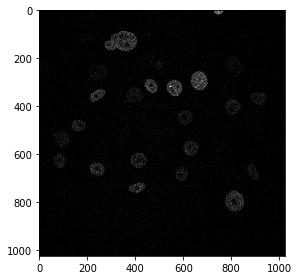

In [4]:
g_raw = gocell.io.imread('~/Documents/data/isbi2013/N2DH-GOWT1/02/t%02d.tif' % 0)
imshow(g_raw, 'gray')
tight_layout()

In [9]:
%%time

data, cfg = pipeline.process_image(g_raw, cfg={
        'preprocess': {
            'remove_dark_spots': True
        },
        'seeds': {
            'max_count': 100,
            'exclude_border': False
        },
        'superpixels_entropy': {
            'sigma': 9.
        },
        'compute_candidates': {
            'max_superpixel_distance': 85,
            'max_superpixel_depth': 2
        },
        'max_setpack_weights': {
            'beta': 1
        },
        'postprocess': {
            'energy_threshold': {
                'gauss_tolerance': 1
            }
        }
    });

Removed 42 dark spots
Superpixels: 100
Discarded 50 superpixels, 50 remaining
Computed superpixel adjacencies
Candidates: 113
Unique candidates: 89
Computed 89 intensity models
Processed candidates: 89
Analyzed 89 candidates
Computed MAXSETPACK weights
Greedy MAXSETPACK - Accepted candidates: 40
Minimum accuracy of MAXSETPACK solution: 86.50 %
CPU times: user 5min 51s, sys: 1min, total: 6min 52s
Wall time: 42min 6s


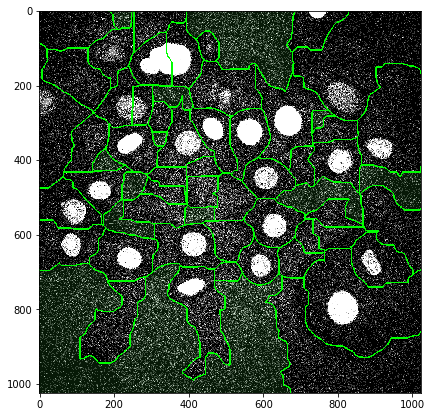

In [10]:
figure(figsize=(6,6))
imshow(gocell.render.render_superpixels(data, border_radius=2))
tight_layout()

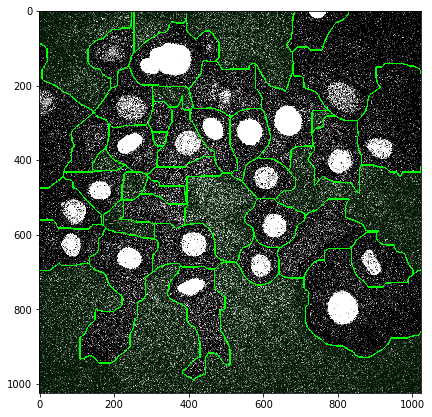

In [11]:
figure(figsize=(6,6))
imshow(gocell.render.render_activity_regions(data))
tight_layout()

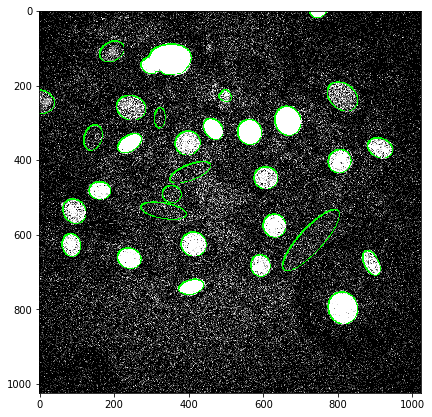

In [12]:
figure(figsize=(6,6))
imshow(gocell.render.render_model_shapes_over_image(data))
tight_layout()

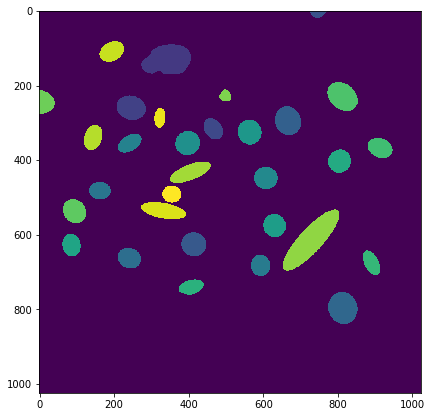

In [13]:
figure(figsize=(6,6))
imshow(gocell.render.rasterize_labels(data, background_label=-5))
tight_layout()

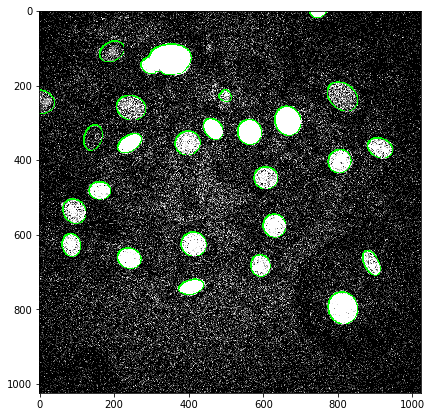

In [14]:
data, cfg = pipeline.process_image(g_raw, data=data, first_stage='postprocess',
                                   cfg={
        'postprocess': {
            'energy_threshold': {
                'gauss_tolerance': 0.5
            }
        }
    })

figure(figsize=(6,6))
imshow(gocell.render.render_model_shapes_over_image(data))
tight_layout()

In [15]:
gocell.mapper.fork.DEBUG = True

In [16]:
%%time

data, cfg = pipeline.process_image(g_raw, cfg={
        'preprocess': {
            'remove_dark_spots': True
        },
        'seeds': {
            'max_count': 100,
            'exclude_border': False
        },
        'superpixels_entropy': {
            'sigma': 9.
        },
        'compute_candidates': {
            'max_superpixel_distance': 85,
            'max_superpixel_depth': 2
        },
        'max_setpack_weights': {
            'beta': 1
        },
        'postprocess': {
            'energy_threshold': {
                'gauss_tolerance': 1
            }
        }
    });

Removed 42 dark spots
Superpixels: 100
Discarded 50 superpixels, 50 remaining
Computed superpixel adjacencies
Candidates: 113
Unique candidates: 89
Computed 89 intensity models
Processed candidates: 89
Analyzed 89 candidates
Computed MAXSETPACK weights
Greedy MAXSETPACK - Accepted candidates: 40
Minimum accuracy of MAXSETPACK solution: 86.50 %
CPU times: user 7h 41min 12s, sys: 48min 11s, total: 8h 29min 23s
Wall time: 2h 28min 23s
